### Self-Study Colab Activity 4.4: More Sophisticated Plotting

#### Customer Profiling

This activity is meant to give you practice exploring data, including the use of visualizations with `matplotlib`, `seaborn`, and `plotly`.  The dataset contains demographic information on the customers, information on customer purchases, engagement of customers with promotions, and information on where customer purchases happened.  A complete data dictionary can be found below.  

Your task is to explore the data and use visualizations to inform answers to specific questions using the data.  The questions and resulting visualization should be posted in the group discussion related to this activity.  Some example problems/questions to explore could be:

-----

- Does income differentiate customers who purchase wine?
- What customers are more likely to participate in the last promotional campaign?
- Are customers with children more likely to purchase products online?
- Do married people purchase more wine?
- What kinds of purchases led to customer complaints?

-----

**Note that the solution code provided below is just an example solution. You are encouraged to manipulate the data in a different way than the one shown below and provide questions to generate different visualizations based on your interest.**

### Data Dictionary

Attributes


```
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise


MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion


AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s web site in the last month
```

In [38]:
import pandas as pd
#add necessary imports
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [31]:
df = pd.read_csv('data/marketing_campaign.csv', sep = '\t')

In [32]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Basic EDA and Feature Engineering

The code cell below creates new columns in the DataFrame: `FoodTotal`, `HealthyFactors` and `HealthFactor`:

In [34]:
df["FoodTotal"] = df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts']
df["HealthyFoods"] = df['MntFruits'] + df['MntFishProducts'] + df['MntMeatProducts']
df["HealthDiet"] = df['HealthyFoods']/df['FoodTotal']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,FoodTotal,HealthyFoods,HealthDiet
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,894,806,0.901566
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,10,9,0.900000
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,308,287,0.931818
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,37,34,0.918919
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,234,207,0.884615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,385,267,0.693506
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,30,30,1.000000
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,309,297,0.961165
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,354,324,0.915254


### Question 1: Do households with higher education eat healthier?

**Process**: Define a healthy diet (`HealthDiet`) as the fraction of fruits, meat, and fish in the diet.

The code cell above creates a column `HealthDiet` based on the above definition of a healthy diet.

To see whether households with higher education eat healthier, we can create a Seaborn boxplot of HealthFactor vs Education.

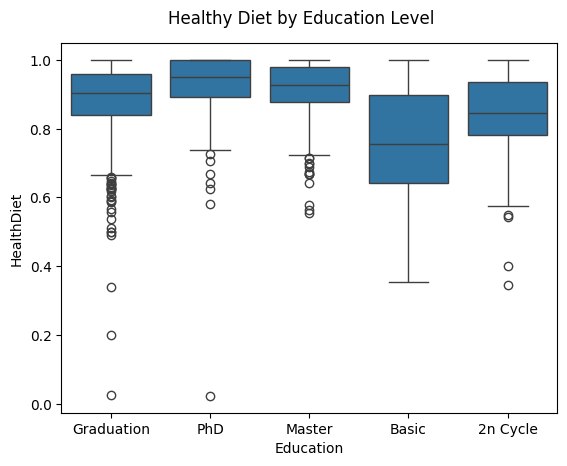

In [35]:
sns.boxplot(data=df, x="Education", y="HealthDiet")
plt.suptitle('Healthy Diet by Education Level', y='0.95')
plt.savefig("data\HealthyDietByEducation-box.png")

**Conclusion**: No; households with a “basic” education level eat the most healthy!
As expected, higher education levels correlate with a healthy diet, with people with a basic education having the most unhealthy diet.


### Question 2: Do rich people complain more?

**Process**: Use Plotly to produce a histogram of `Income` vs `Complain`. To amke this plot meangful, we first create a trimmed version of the original dataframe, `df_trimmed` to include users with an income of lesser that or equal to $150,000.



In [41]:
df_trimmed = df[df['Income'] <= 150_000]
plt2 = px.histogram(df_trimmed, x = 'Income', y = 'Complain', nbins = 10)
plt2.update_layout(title="Complaints by Income Level", title_x = 0.5)
plt2.show()
plt2.write_html("data\Complaints by Income level.html")

**Conclusion**: Lower to mid-income households seem to lodge more complaints.

### Question 3: Does income differentiate customers who purchase wine?

**Process**: We use again `df_trimmed` to create a more meaningful plot and use a scatter p plot along with histograms using `x` and `y` marginals to obtain a quick look at the distributions.

In [45]:
df_trimmed = df[df["Income"] <= 150_000]
px.scatter(df_trimmed, x='Income', y='MntWines', marginal_x="histogram", marginal_y="histogram")

**Conclusion**: The number of purchased wines jumps to 500 or higher after the $40K income mark. Additionally, the number of customers purchasing wines between 0-49 amount is staggeringly high compared to all other amounts (seen from the histogram of the y-axis).